In [1]:
%matplotlib widget

In [2]:
from dataclasses import dataclass

import numpy as np
import matplotlib.pylab as plt

from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid
from pyinverse.axes import RegularAxes3

In [3]:
@dataclass
class Ellipsoid:
    d_x: float
    d_y: float
    d_z: float

    a: float
    b: float
    c: float
        
    phi: float
    
    rho: float

In [4]:
E_A = Ellipsoid(0, 0, 0, 0.69, 0.92, 0.9, 0, 2)

In [5]:
def R_Z(phi):
    c_phi = np.cos(phi)
    s_phi = np.sin(phi)
    return np.array([[c_phi, -s_phi, 0], [s_phi, c_phi, 0], [0, 0, 1]])

In [6]:
def g(x, y, z, a, b, c, rho):
    if (x/a)**2 + (y/b)**2 + (z/c)**2 <= 1:
        return rho
    else:
        return 0

In [7]:
N = 255

axis_x = RegularAxis.linspace(-1, 1, N)
axis_y = RegularAxis.linspace(-1, 1, N)

In [8]:
grid = RegularGrid(axis_x, axis_y)

In [9]:
list(zip(grid.centers[0].flat, grid.centers[1].flat))

[(-1.0, -1.0),
 (-0.9921259842519685, -1.0),
 (-0.984251968503937, -1.0),
 (-0.9763779527559056, -1.0),
 (-0.9685039370078741, -1.0),
 (-0.9606299212598425, -1.0),
 (-0.952755905511811, -1.0),
 (-0.9448818897637795, -1.0),
 (-0.937007874015748, -1.0),
 (-0.9291338582677166, -1.0),
 (-0.9212598425196851, -1.0),
 (-0.9133858267716536, -1.0),
 (-0.905511811023622, -1.0),
 (-0.8976377952755905, -1.0),
 (-0.889763779527559, -1.0),
 (-0.8818897637795275, -1.0),
 (-0.8740157480314961, -1.0),
 (-0.8661417322834646, -1.0),
 (-0.8582677165354331, -1.0),
 (-0.8503937007874016, -1.0),
 (-0.8425196850393701, -1.0),
 (-0.8346456692913387, -1.0),
 (-0.8267716535433071, -1.0),
 (-0.8188976377952756, -1.0),
 (-0.8110236220472441, -1.0),
 (-0.8031496062992126, -1.0),
 (-0.7952755905511811, -1.0),
 (-0.7874015748031495, -1.0),
 (-0.7795275590551181, -1.0),
 (-0.7716535433070866, -1.0),
 (-0.7637795275590551, -1.0),
 (-0.7559055118110236, -1.0),
 (-0.7480314960629921, -1.0),
 (-0.7401574803149606, -1.0),


In [10]:
xyz = [[x_y[0], x_y[1], 0] for x_y in list(zip(grid.centers[0].flat, grid.centers[1].flat))]

In [11]:
px_py_pz = [R_Z(E_A.phi).T @ (xyz_i - np.array([E_A.d_x, E_A.d_y, E_A.d_z])) for xyz_i in xyz]
len(px_py_pz)

65025

In [12]:
rho_A = np.array([g(x[0], x[1], x[2], E_A.a, E_A.b, E_A.c, E_A.rho) for x in px_py_pz])
rho_A.shape = N, N

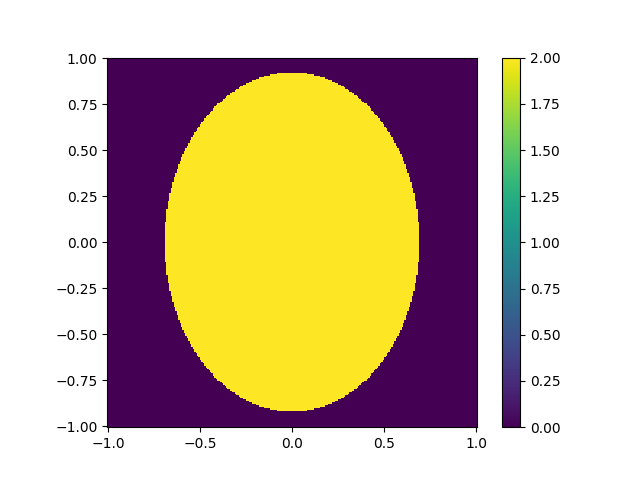

In [13]:
fig, ax = plt.subplots()
im = grid.plot(ax, rho_A)
fig.colorbar(im)

In [14]:
axis_z = RegularAxis(0, 0, 1)
axes3 = RegularAxes3(axis_x, axis_y, axis_z)

In [15]:
list(zip(*(axis.flat for axis in axes3.centers)))

[(-1.0, -1.0, 0.0),
 (-0.9921259842519685, -1.0, 0.0),
 (-0.984251968503937, -1.0, 0.0),
 (-0.9763779527559056, -1.0, 0.0),
 (-0.9685039370078741, -1.0, 0.0),
 (-0.9606299212598425, -1.0, 0.0),
 (-0.952755905511811, -1.0, 0.0),
 (-0.9448818897637795, -1.0, 0.0),
 (-0.937007874015748, -1.0, 0.0),
 (-0.9291338582677166, -1.0, 0.0),
 (-0.9212598425196851, -1.0, 0.0),
 (-0.9133858267716536, -1.0, 0.0),
 (-0.905511811023622, -1.0, 0.0),
 (-0.8976377952755905, -1.0, 0.0),
 (-0.889763779527559, -1.0, 0.0),
 (-0.8818897637795275, -1.0, 0.0),
 (-0.8740157480314961, -1.0, 0.0),
 (-0.8661417322834646, -1.0, 0.0),
 (-0.8582677165354331, -1.0, 0.0),
 (-0.8503937007874016, -1.0, 0.0),
 (-0.8425196850393701, -1.0, 0.0),
 (-0.8346456692913387, -1.0, 0.0),
 (-0.8267716535433071, -1.0, 0.0),
 (-0.8188976377952756, -1.0, 0.0),
 (-0.8110236220472441, -1.0, 0.0),
 (-0.8031496062992126, -1.0, 0.0),
 (-0.7952755905511811, -1.0, 0.0),
 (-0.7874015748031495, -1.0, 0.0),
 (-0.7795275590551181, -1.0, 0.0),
 (-0.

## Multiple ellipses

In [16]:
E_list = [Ellipsoid( 0,     0,     0,     0.69,   0.92,  0.9,   0,          2),
          Ellipsoid( 0,     0,     0,     0.6624, 0.874, 0.88,  0,         -0.8),
          Ellipsoid(-0.22,  0,    -0.25,  0.41,   0.16,  0.21,  3*np.pi/5, -0.2),
          Ellipsoid( 0.22,  0,    -0.25,  0.31,   0.11,  0.22,  2*np.pi/5, -0.2), 
          Ellipsoid( 0,     0.35, -0.25,  0.21,   0.25,  0.5,   0,          0.2),
          Ellipsoid( 0,     0.1,  -0.25,  0.046,  0.046, 0.046, 0,          0.2),
          Ellipsoid(-0.08, -0.65, -0.25,  0.046,  0.023, 0.02,  0,          0.1),
          Ellipsoid( 0.06, -0.65, -0.25,  0.046,  0.023, 0.02,  np.pi/2,    0.1),
          Ellipsoid( 0.06, -0.105, 0.625, 0.056,  0.04,  0.1,   np.pi/2,    0.2),
          Ellipsoid( 0,     0.1,   0.625, 0.056,  0.056, 0.1,   0,         -0.2)]

In [17]:
z0 = -0.25
rho = np.zeros((N, N))
xyz = [[x_y[0], x_y[1], z0] for x_y in list(zip(grid.centers[0].flat, grid.centers[1].flat))]
for E in E_list:
    px_py_pz = [R_Z(E.phi).T @ (xyz_i - np.array([E.d_x, E.d_y, E.d_z])) for xyz_i in xyz]
    rho_E = np.array([g(x[0], x[1], x[2], E.a, E.b, E.c, E.rho) for x in px_py_pz])
    rho_E.shape = N, N
    rho += rho_E

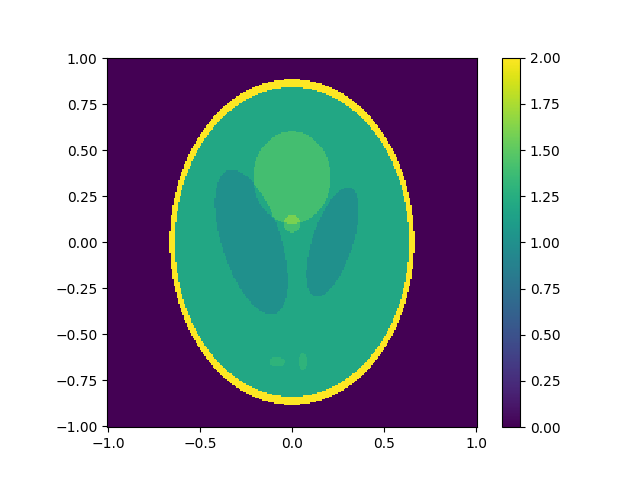

In [18]:
fig, ax = plt.subplots()
im = grid.plot(ax, rho)
fig.colorbar(im)

In [19]:
xyz[:10]

[[-1.0, -1.0, -0.25],
 [-0.9921259842519685, -1.0, -0.25],
 [-0.984251968503937, -1.0, -0.25],
 [-0.9763779527559056, -1.0, -0.25],
 [-0.9685039370078741, -1.0, -0.25],
 [-0.9606299212598425, -1.0, -0.25],
 [-0.952755905511811, -1.0, -0.25],
 [-0.9448818897637795, -1.0, -0.25],
 [-0.937007874015748, -1.0, -0.25],
 [-0.9291338582677166, -1.0, -0.25]]

In [20]:
y0 = 0.125
rho2 = np.zeros((N, N))
xyz = [[x_y[0], y0, x_y[1]] for x_y in list(zip(grid.centers[0].flat, grid.centers[1].flat))]
for E in E_list:
    px_py_pz = [R_Z(E.phi).T @ (xyz_i - np.array([E.d_x, E.d_y, E.d_z])) for xyz_i in xyz]
    rho_E = np.array([g(x[0], x[1], x[2], E.a, E.b, E.c, E.rho) for x in px_py_pz])
    rho_E.shape = N, N
    rho2 += rho_E

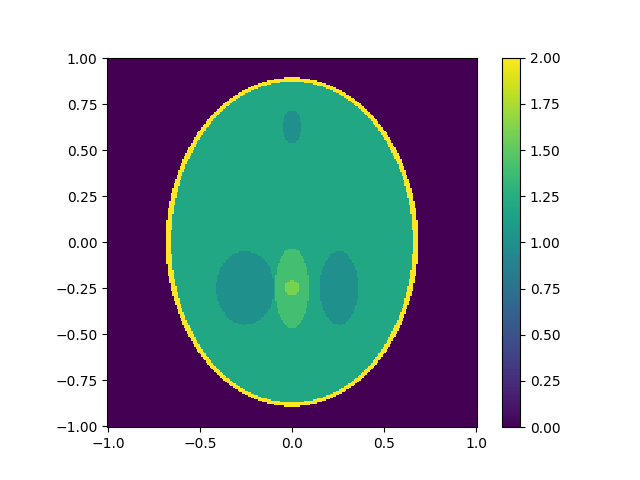

In [21]:
fig, ax = plt.subplots()
im = grid.plot(ax, rho2)
fig.colorbar(im)